In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shutil
import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [2]:
from glob import glob
trn='F:/D-Video/PennA/Penn_Action/*/'
tr= glob(trn)
len(tr)

15

In [3]:
train = []
val = []
test = []
train_y = []
val_y = []
test_y = []

y = 0
for i in tr:
    
    #print(i)
    x = glob(i+'/*/')
    
    #shuffle(x)
    t,tt = train_test_split( x , test_size=0.1, random_state=42)
    t, vv = train_test_split( t , test_size=0.1, random_state=42)
    
    for j in t:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
        
        train.append(j)
        train_y.append(y)
    
    for j in vv:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
            
        val.append(j)
        val_y.append(y)
        
    for j in tt:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
            
        test.append(j)
        test_y.append(y)
        
    y = y+1

from tensorflow.keras.utils import to_categorical
tra_y =  np.array(to_categorical(train_y))
va_y  =  np.array(to_categorical(val_y))
te_y  =  np.array(to_categorical(test_y))

(train, tra_y) = shuffle(train, tra_y)
(val, va_y) = shuffle(val, va_y)
(test, te_y) = shuffle(test, te_y)

C:\Users\shaif\AppData\Local\Temp\ipykernel_10204\3980388606.py:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((56,56), Image.ANTIALIAS)


Combined image shape: (224, 224, 3)


C:\Users\shaif\AppData\Local\Temp\ipykernel_10204\3980388606.py:62: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = q.resize((560,560), Image.ANTIALIAS)


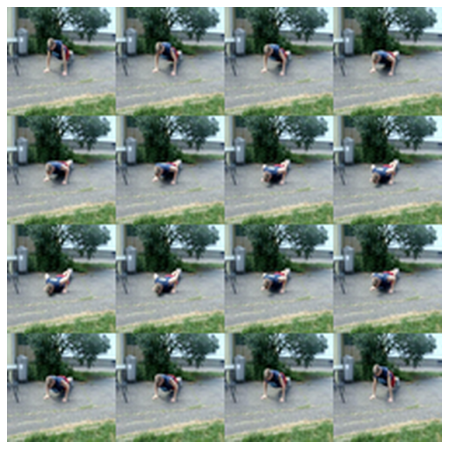

In [4]:
from PIL import Image
import numpy as np

i = 9
x = glob(tr[i]+'/*/')
vid = glob(x[i] +'/*')
vid[:2]


def resize_images(q):
    img = Image.fromarray(q)
    resized_img = img.resize((56,56), Image.ANTIALIAS)
    return resized_img

def generate_and_sort(n):
    unique_numbers = set()
    while len(unique_numbers) < 16:
        unique_numbers.add(random.randint(0, n))
    sorted_numbers = sorted(unique_numbers)
    return sorted_numbers


def prepare_videoes(image_paths):
    images = []
    
    for path in image_paths:
        # Load image
        img = Image.open(path)
        
        # Convert to RGB if not already
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Resize the image
        img = img.resize((56,56), Image.ANTIALIAS)
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Append the processed image to the list
        images.append(img_array)
    
    n = np.shape(images)[0] - 1
    sortn = generate_and_sort(n)
    #print(sortn)
    img_parts = [images[i] for i in sortn]
    #print(np.shape(img_parts))
    
    combined_image = np.zeros((224, 224, 3), dtype=np.uint8)
    
    for i, img_part in enumerate(img_parts):
        row = i // 4
        col = i % 4
        combined_image[row*56:(row+1)*56, col*56:(col+1)*56, :] = img_part
        
    return combined_image

combined_image = prepare_videoes(vid)
print("Combined image shape:", combined_image.shape)

q =  Image.fromarray(combined_image)
resized_image = q.resize((560,560), Image.ANTIALIAS)
# Display the resized image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [5]:

def get_te(k , a) :
    x = glob(k+'/*')
    imgdata=[]
        
    idata = np.array(prepare_videoes(x))
    X_train = idata
    X_train = X_train.astype('float32') / 255.
    #print(np.shape(X_train))
    return X_train

def get_cat(k) :
    return np.array(k)

In [6]:
class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , labels, batch_size) :
    self.filename = filename
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    y_train = get_cat(batch_y)
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x]), np.array( y_train )

class My_Test_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , batch_size) :
    self.filename = filename
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x])

batch_size = 16

my_training_batch_generator = My_Custom_Generator(train, tra_y, batch_size)
my_validation_batch_generator = My_Custom_Generator(val, va_y, batch_size)

In [7]:
arr = np.array(My_Test_Generator(test, batch_size).__getitem__(1))
for i in range(2,len(x)):
    x = My_Test_Generator(test, batch_size).__getitem__(i)
    arr = np.concatenate((arr,x),axis=0)
    
np.shape(arr)

C:\Users\shaif\AppData\Local\Temp\ipykernel_10204\3980388606.py:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((56,56), Image.ANTIALIAS)


KeyboardInterrupt: 

In [10]:
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

# Load the pre-trained model
model_path = r"C:\Users\shaif\Downloads\penn_video_ssl.h5"
base_model = load_model(model_path)

# Set the first layer to non-trainable (if needed)
# base_model.trainable = False  # Uncomment this line if you want to freeze the base model

# Create a new model using Sequential, adding new layers on top of the base model
new_model = keras.models.Sequential([
    base_model,
    Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)),
    Dense(15, activation='softmax')
])

# Print the model summary
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 5000)              88079064  
                                                                 
 dense_2 (Dense)             (None, 1024)              5121024   
                                                                 
 dense_3 (Dense)             (None, 15)                15375     
                                                                 
Total params: 93,215,463
Trainable params: 93,142,343
Non-trainable params: 73,120
_________________________________________________________________


In [12]:
from tensorflow.keras.optimizers import Adam
new_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
new_model.fit_generator(generator=my_training_batch_generator, epochs=20, validation_data=my_validation_batch_generator)

C:\Users\shaif\anaconda3\envs\tens\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\shaif\AppData\Local\Temp\ipykernel_10204\3349489804.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  new_model.fit_generator(generator=my_training_batch_generator, epochs=20, validation_data=my_validation_batch_generator)
C:\Users\shaif\AppData\Local\Temp\ipykernel_10204\3980388606.py:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((56,56), Image.ANTIALIAS)


Epoch 1/20
113/118 [===========================>..] - ETA: 49s - loss: 94.3028 - accuracy: 0.0842

KeyboardInterrupt: 